# **MODERN COMPUTER VISION** #
##### BY RAJEEV RATAN

<h2 style="margin-bottom:0;">🚀 Single Shot Detectors (SSDs) with OpenCV</h2>

<h5 style="margin-top:5px;">In this lesson we'll learn how to use pre-trained Models to implement an SSD in OpenCV.</h5>

In [1]:
# Our Setup, Import Libraries and Create our Imshow Function
import numpy as np
import cv2
import time
import os
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

!gdown --id 102uCujErifjvK1ziRGssaQ09khI15g6q
!gdown --id 1I242ygNivRhYJ6kIEfvlAhg_2WMTgDDv
!unzip -qq images.zip
!unzip -qq SSDs.zip

/home/robin/Self-learning/Tutorialspoint_Artificial_Intelligence_and_Machine_Learning_Certification_2026/Module_4_Modern_Computer_Vision/OpenCV/.venv/lib/python3.12/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=102uCujErifjvK1ziRGssaQ09khI15g6q

but Gdown can't. Please check connections and permissions.
/home/robin/Self-learning/Tutorialspoint_Artificial_Intelligence_and_Machine_Learning_Certification_2026/Module_4_Modern_Computer_Vision/OpenCV/.venv/lib/python3.12/site-packages/gdown/__main__.py:140: FutureWarn

In [4]:
import kagglehub

path = kagglehub.dataset_download("awsaf49/coco-2017-dataset")
print(path)


100%|██████████| 25.0G/25.0G [46:41<00:00, 9.60MB/s]  

Extracting files...


/home/robin/.cache/kagglehub/datasets/awsaf49/coco-2017-dataset/versions/2


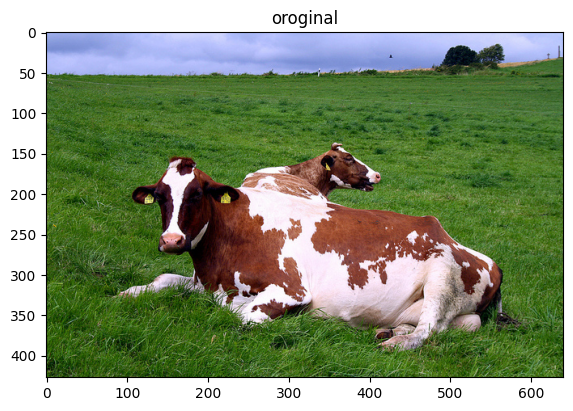

Running our Single Shot Detector on our image...


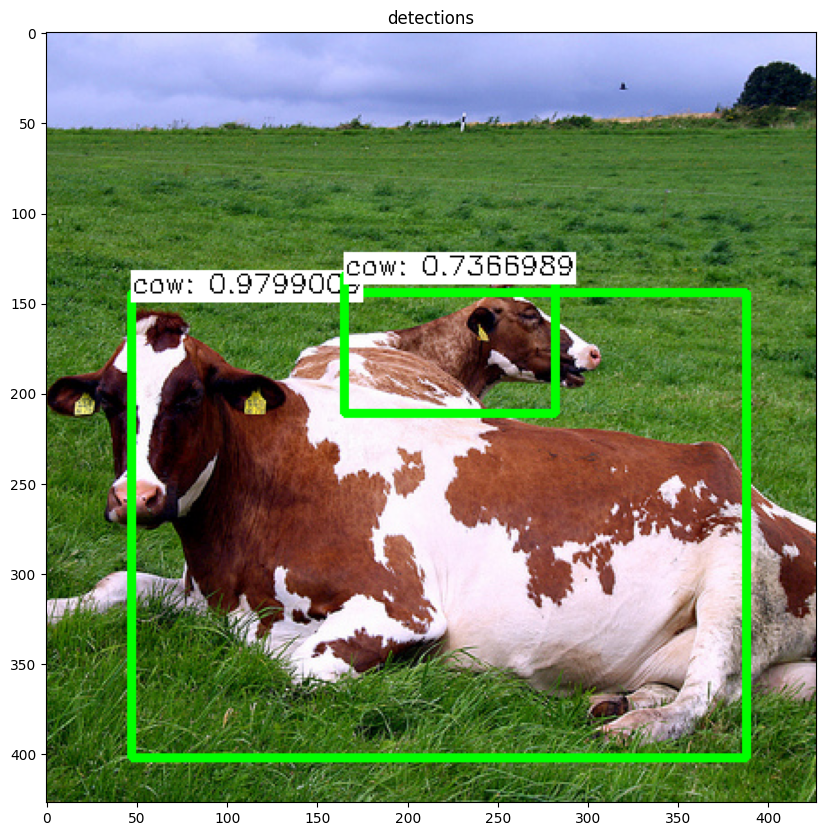

In [9]:
# Load our images
frame = cv2.imread('../SSDs/coco-2017-dataset/versions/2/coco2017/test2017/000000000019.jpg')
#frame = cv2.imread('../SSDs/coco-2017-dataset/versions/2/coco2017/test2017/000000000069.jpg')
#frame = cv2.imread('../SSDs/coco-2017-dataset/versions/2/coco2017/test2017/000000002845.jpg')
imshow("oroginal", frame)

print("Running our Single Shot Detector on our image...")
# Make a copy of our loaded image
image = frame.copy()

# Set the widths and heights that are needed for input into our model
inWidth = 300
inHeight = 300
WHRatio = inWidth / float(inHeight)

# These are needed for our preprocessing of our image
inScaleFactor = 0.007843
meanVal = 127.5

# Point to the paths of our weights and model architecture in a protocol buffer
prototxt = "../SSDs/ssd_mobilenet_v1_coco.pbtxt"
weights = "../SSDs/frozen_inference_graph.pb"

# Number of classes
num_classes = 90

# Probability Threshold
thr = 0.5

net = cv2.dnn.readNetFromTensorflow(weights, prototxt)

swapRB = True
classNames = {0: 'background',
    1: 'person', 2: 'bicycle', 3: 'car', 4: 'motocycle', 5: 'airplane', 6: 'bus',
    7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant',
    13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat',
    18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear',
    24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag',
    32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard',
    37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove',
    41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle',
    46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon',
    51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange',
    56: 'brocoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut',
    61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed',
    67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse',
    75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'microwave', 79: 'oven',
    80: 'toaster', 81: 'sink', 82: 'refrigerator', 84: 'book', 85: 'clock',
    86: 'vase', 87: 'scissors', 88: 'teddy bear', 89: 'hair drier', 90: 'toothbrush'}

# Create our input image blob required for input into our network
blob = cv2.dnn.blobFromImage(frame, inScaleFactor, (inWidth, inHeight), (meanVal, meanVal, meanVal), swapRB)
net.setInput(blob)

# Pass our input image/blob into the network
detections = net.forward()

# Crop frame if needed as we don't resize our input but take a square input
cols = frame.shape[1]
rows = frame.shape[0]

if cols / float(rows) > WHRatio:
    cropSize = (int(rows * WHRatio), rows)
else:
    cropSize = (cols, int(cols / WHRatio))

y1 = int((rows - cropSize[1]) / 2)
y2 = y1 + cropSize[1]
x1 = int((cols - cropSize[0]) / 2)
x2 = x1 + cropSize[0]
frame = frame[y1:y2, x1:x2]

cols = frame.shape[1]
rows = frame.shape[0]

# Iterate over every detection
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    # Once confidence is greater than the threshold we get our bounding box
    if confidence > thr:
        class_id = int(detections[0, 0, i, 1])

        xLeftBottom = int(detections[0, 0, i, 3] * cols)
        yLeftBottom = int(detections[0, 0, i, 4] * rows)
        xRightTop = int(detections[0, 0, i, 5] * cols)
        yRightTop = int(detections[0, 0, i, 6] * rows)

        # Draw our bounding box over our image
        cv2.rectangle(frame, (xLeftBottom, yLeftBottom), (xRightTop, yRightTop),
                      (0, 255, 0), 3)
        
        # Get our class names and put them on our image (using a white background)
        if class_id in classNames:
            label = classNames[class_id] + ": " + str(confidence)
            labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)

            yLeftBottom = max(yLeftBottom, labelSize[1])
            cv2.rectangle(frame, (xLeftBottom, yLeftBottom - labelSize[1]),
                                 (xLeftBottom + labelSize[0], yLeftBottom + baseLine),
                                 (255, 255, 255), cv2.FILLED)
            cv2.putText(frame, label, (xLeftBottom, yLeftBottom),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
            
# Show our detectopms
imshow("detections", frame)

##### **Find other pretrained models here -** https://github.com/tensorflow/models/tree/master/research/object_detection/samples/configs #####